Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

Importing Data

In [2]:
df = pd.read_csv (r'/Users/amansr/Downloads/UMichMLTrial(2).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 22 columns):
Timestamp                                                                                                                                842 non-null object
Did you get into the University of Michigan?                                                                                             842 non-null object
What College within the University of Michigan did you apply to?                                                                         842 non-null object
What was the nature of your application to the University of Michigan?                                                                   842 non-null object
If you took the SAT, what was your score out of 1600 (Ex. 1500)?                                                                         621 non-null float64
If you took the ACT, what was your score out of 36 (Ex. 34)?                                                 

In [4]:
df.head(1)

,Timestamp,Did you get into the University of Michigan?,What College within the University of Michigan did you apply to?,What was the nature of your application to the University of Michigan?,"If you took the SAT, what was your score out of 1600 (Ex. 1500)?","If you took the ACT, what was your score out of 36 (Ex. 34)?",Where would you rank yourself academically in class?,How many SAT Subject Test Scores were submitted with a score of >= 700?,How many AP Test Scores were submitted with a score of >= 3?,How many IB Test Scores were submitted with a score of >= 5?,...,What was your residency status when you applied to the University of Michigan?,Were you considered a legacy (i.e. your parents or siblings went to the University of Michigan)?,Were you considered a first-generation college student (i.e. you were the first in your family to go to college)?,Did you ask for Financial Aid?,Were you a part of Student government at your school?,Did you have any notable leadership positions in high school (i.e. President/Vice-President of a club)?,Were you a member of a Sports team in high school (Dedicated 100+ hours)?,Did you volunteer in high school (Dedicated 100+ hours)?,"Did you participate in the performing arts (dance, drama and other forms of artistic expressions) while in high school (100+ hours)?","If you'd like to be considered for the Amazon gift card raffle, please enter an email id that we can send the gift card to (Optional)"
0,2020/07/17 12:29:31 AM GMT+4,Yes,College of Engineering (CoE),Early Action / EA,NaN,35.0,Top 50%,2 and above,1-3,0,...,International,No,No,No,Yes,Yes,No,Yes,No,NaN


In [5]:
df.drop('Timestamp', axis = 1, inplace = True)

Making the columns readable now

In [6]:
df.rename(columns = {'Did you get into the University of Michigan?':'Accepted'},inplace = True)
df.rename(columns = {'What was the nature of your application to the University of Michigan?':'EA/RA','If you took the SAT, what was your score out of 1600 (Ex. 1500)?':'SAT','If you took the ACT, what was your score out of 36 (Ex. 34)?':'ACT'},inplace = True)
df.rename(columns = {'Where would you rank yourself academically in class?':'Rank','What College within the University of Michigan did you apply to?':'College'},inplace = True)
df.rename(columns = {'How many SAT Subject Test Scores were submitted with a score of >= 700?':'SAT II'},inplace = True)
df.rename(columns = {'How many AP Test Scores were submitted with a score of >= 3?':'AP', 'How many IB Test Scores were submitted with a score of >= 5?':'IB', 'What gender identity do you most identify with?':'Gender','What was your residency status when you applied to the University of Michigan?':'Residency Status', 'Were you considered a legacy (i.e. your parents or siblings went to the University of Michigan)?':'Legacy', 'Were you considered a first-generation college student (i.e. you were the first in your family to go to college)?':'First-Gen', 'Did you ask for Financial Aid?':'Financial Aid'}, inplace = True)
df.rename(columns = {'Were you a part of Student government at your school?':'Student Gov','Did you have any notable leadership positions in high school (i.e. President/Vice-President of a club)?':'Leadership', 'Please indicate your ethnicity?':'Ethnicity','Were you a member of a Sports team in high school (Dedicated 100+ hours)?':'Sports','Did you volunteer in high school (Dedicated 100+ hours)?':'Volunteer','Did you participate in the performing arts (dance, drama and other forms of artistic expressions) while in high school (100+ hours)?':'Performing Arts',"If you'd like to be considered for the Amazon gift card raffle, please enter an email id that we can send the gift card to (Optional)":'Email'}, inplace = True)

In [7]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 21 columns):
Accepted            842 non-null object
College             842 non-null object
EA/RA               842 non-null object
SAT                 621 non-null float64
ACT                 457 non-null float64
Rank                842 non-null object
SAT II              842 non-null object
AP                  842 non-null object
IB                  842 non-null object
Gender              842 non-null object
Ethnicity           842 non-null object
Residency Status    842 non-null object
Legacy              842 non-null object
First-Gen           842 non-null object
Financial Aid       842 non-null object
Student Gov         842 non-null object
Leadership          842 non-null object
Sports              842 non-null object
Volunteer           842 non-null object
Performing Arts     842 non-null object
Email               649 non-null object
dtypes: float64(2), object(19)
memory usage: 138.2+ K

In [8]:
df['SAT'].head(3)

0       NaN
1    1490.0
2    1500.0
Name: SAT, dtype: float64

Removing Invalid Entries: 1) No SAT and ACT 2) insnanely low SAT/ACT scores (1000/11) 3) SAT Score not ending with 0

In [9]:
ScamEntry = (df['SAT'].isnull() & df['ACT'].isnull())

In [10]:
ScamIndices = df[ScamEntry].index

In [11]:
df.drop(ScamIndices, inplace = True)

In [12]:
df.reset_index(drop=True, inplace = True)

TODO: Need to check manually

In [13]:
df[(df['ACT'] <= 11)]

,Accepted,College,EA/RA,SAT,ACT,Rank,SAT II,AP,IB,Gender,...,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Email
151,No,"College of Literature, Science, and the Arts (...",Early Action / EA,1150.0,0.0,Top 50%,0,0,0,Male,...,In-State,No,Yes,Yes,No,No,No,Yes,No,mrgraffittiart@gmail.com
641,Yes,Other,Regular Decision / RD,5.0,5.0,Top 50%,1,0,0,Male,...,International,No,Yes,Yes,Yes,No,Yes,No,Yes,voluntary bias much?


In [14]:
df.drop(df.index[641],inplace = True)

In [15]:
df.reset_index(drop=True, inplace = True)

In [16]:
df[(df['SAT'] < 1000)]

,Accepted,College,EA/RA,SAT,ACT,Rank,SAT II,AP,IB,Gender,...,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Email
636,Yes,Ross School of Business,Early Action / EA,800.0,17.0,Top 10%,0,0,0,Female,...,In-State,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Amills1600@yahoo.com


In [17]:
df.drop(df.index[636],inplace = True)

In [18]:
df.reset_index(drop=True, inplace = True)

In [19]:
ScoreTemp = df['SAT'].dropna()

In [20]:
ScoreTempIndex = ScoreTemp[ScoreTemp%10 != 0].index

In [21]:
df.drop(ScoreTempIndex, inplace = True)

In [22]:
df.reset_index(drop=True, inplace = True)

Seperate Email Id and turn it into lottery (and filter out lottery)

In [23]:
Lottery = df['Email']

In [24]:
Lottery.dropna(inplace = True)

In [25]:
Lottery.reset_index(drop=True, inplace = True)

In [26]:
df.drop('Email',axis = 1,inplace = True)

Convert SAT and ACT score to one column

In [27]:
def ConvertScore(SatScore):
    if (np.isnan(SatScore)):
        return 0
    elif (SatScore >= 1570 and SatScore <= 1600):
        return 36
    elif (SatScore >= 1530 and SatScore <= 1560):
        return 35
    elif (SatScore >= 1490 and SatScore <= 1520):
        return 34
    elif (SatScore >= 1450 and SatScore <= 1480):
        return 33
    elif (SatScore >= 1420 and SatScore <= 1440):
        return 32
    elif (SatScore >= 1390 and SatScore <= 1410):
        return 31
    elif (SatScore >= 1360 and SatScore <= 1380):
        return 30
    elif (SatScore >= 1330 and SatScore <= 1350):
        return 29
    elif (SatScore >= 1300 and SatScore <= 1320):
        return 28
    elif (SatScore >= 1260 and SatScore <= 1290):
        return 27
    elif (SatScore >= 1230 and SatScore <= 1250):
        return 26
    elif (SatScore >= 1200 and SatScore <= 1220):
        return 25
    elif (SatScore >= 1160 and SatScore <= 1190):
        return 24
    elif (SatScore >= 1130 and SatScore <= 1150):
        return 23
    elif (SatScore >= 1100 and SatScore <= 1120):
        return 22
    elif (SatScore >= 1060 and SatScore <= 1090):
        return 21
    elif (SatScore >= 1030 and SatScore <= 1050):
        return 20
    elif (SatScore >= 990 and SatScore <= 1020):
        return 19
    elif (SatScore >= 960 and SatScore <= 980):
        return 18
    elif (SatScore >= 920 and SatScore <= 950):
        return 17
    elif (SatScore >= 880 and SatScore <= 910):
        return 16
    elif (SatScore >= 830 and SatScore <= 870):
        return 15
    elif (SatScore >= 780 and SatScore <= 820):
        return 14
    elif (SatScore >= 730 and SatScore <= 770):
        return 13
    elif (SatScore >= 690 and SatScore <= 720):
        return 12
    elif (SatScore >= 650 and SatScore <= 680):
        return 11
    elif (SatScore >= 620 and SatScore <= 640):
        return 10
    elif (SatScore >= 590 and SatScore <= 610):
        return 9
    else:
        return 0
    
    

In [28]:
df['ConvertedAct'] = df.SAT.apply(ConvertScore)

In [29]:
def ActFix(Score):
    if (np.isnan(Score)):
        return 0
    else:
        return Score

In [30]:
df['ACT'] = df.ACT.apply(ActFix)

In [31]:
def ChooseScore(row):
    if (row.ACT >= row.ConvertedAct):
        return row.ACT
    else:
        return row.ConvertedAct

In [32]:
df['Standardized Score'] = df.apply(ChooseScore, axis = 1)

In [33]:
df.drop(['SAT','ACT','ConvertedAct'], axis = 1, inplace = True)

In [34]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,35.0
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,34.0
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,34.0
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,35.0
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,35.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 19 columns):
Accepted              825 non-null object
College               825 non-null object
EA/RA                 825 non-null object
Rank                  825 non-null object
SAT II                825 non-null object
AP                    825 non-null object
IB                    825 non-null object
Gender                825 non-null object
Ethnicity             825 non-null object
Residency Status      825 non-null object
Legacy                825 non-null object
First-Gen             825 non-null object
Financial Aid         825 non-null object
Student Gov           825 non-null object
Leadership            825 non-null object
Sports                825 non-null object
Volunteer             825 non-null object
Performing Arts       825 non-null object
Standardized Score    825 non-null float64
dtypes: float64(1), object(18)
memory usage: 122.5+ KB


Data Visualization

<AxesSubplot:>

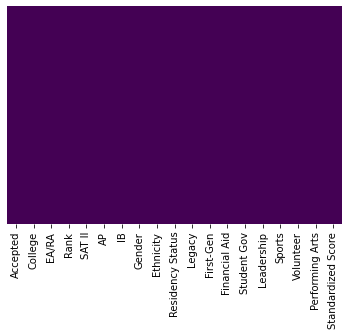

In [36]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='Accepted', ylabel='count'>

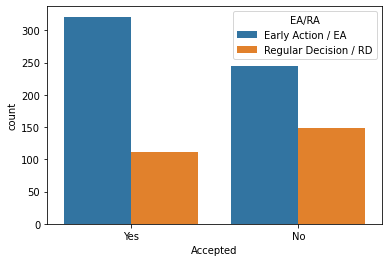

In [37]:
sns.countplot(x = 'Accepted', hue = 'EA/RA', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

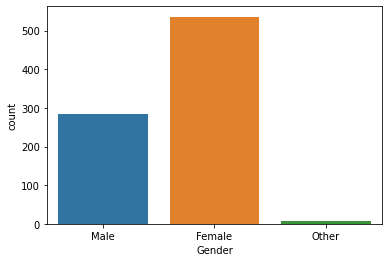

In [38]:
sns.countplot(x = 'Gender',data = df)

<AxesSubplot:xlabel='Standardized Score'>

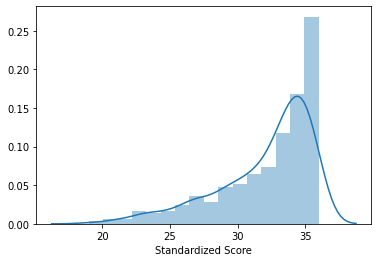

In [39]:
sns.distplot(df['Standardized Score'])

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

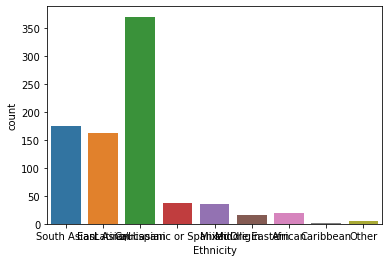

In [40]:
sns.countplot(x = 'Ethnicity', data = df)

Converting Categorical Values

In [41]:
#Accepted = pd.get_dummies(df['Accepted'],drop_first = True).head()
#EARA = pd.get_dummies(df['EA/RA'],drop_first = True).head()
#College = pd.get_dummies(df['College'],drop_first = True).head()
#Rank = pd.get_dummies(df['Rank'],drop_first = True).head()
#SATII = pd.get_dummies(df['SAT II'],drop_first = True).head()




In [42]:
#df = pd.concat([Accepted, EARA, df],axis = 1)

In [43]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,35.0
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,34.0
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,34.0
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,35.0
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,35.0


In [44]:
df[((df['Standardized Score'] == 36) & (df['Accepted'] == 'Yes'))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 8 to 785
Data columns (total 19 columns):
Accepted              49 non-null object
College               49 non-null object
EA/RA                 49 non-null object
Rank                  49 non-null object
SAT II                49 non-null object
AP                    49 non-null object
IB                    49 non-null object
Gender                49 non-null object
Ethnicity             49 non-null object
Residency Status      49 non-null object
Legacy                49 non-null object
First-Gen             49 non-null object
Financial Aid         49 non-null object
Student Gov           49 non-null object
Leadership            49 non-null object
Sports                49 non-null object
Volunteer             49 non-null object
Performing Arts       49 non-null object
Standardized Score    49 non-null float64
dtypes: float64(1), object(18)
memory usage: 7.7+ KB


Convert Standardized Score into a log Distribution

<AxesSubplot:xlabel='Standardized Score'>

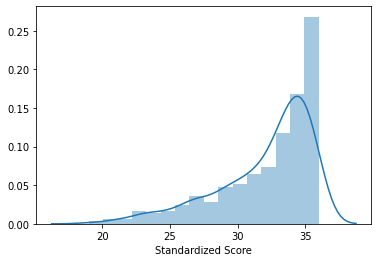

In [45]:
sns.distplot(df['Standardized Score'])

In [46]:
#df['Standardized Score'] = np.log10(df['Standardized Score'])

In [47]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,35.0
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,34.0
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,34.0
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,35.0
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,35.0


<AxesSubplot:>

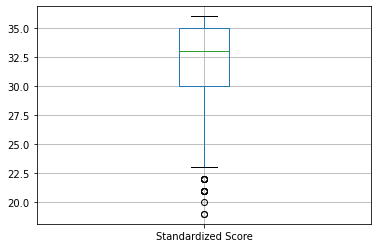

In [48]:
df.boxplot(column = 'Standardized Score')

In [49]:
df['Standardized Score'].skew()

-1.2081024787574712

In [50]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

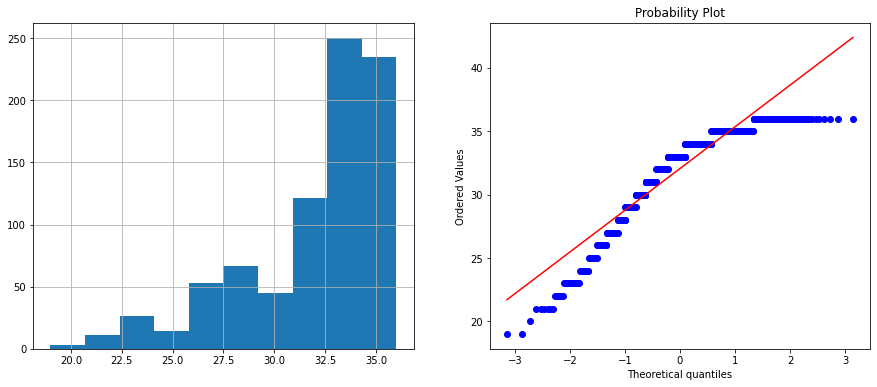

-1.2081024787574712

In [51]:
diagnostic_plots(df, 'Standardized Score')
df['Standardized Score'].skew()

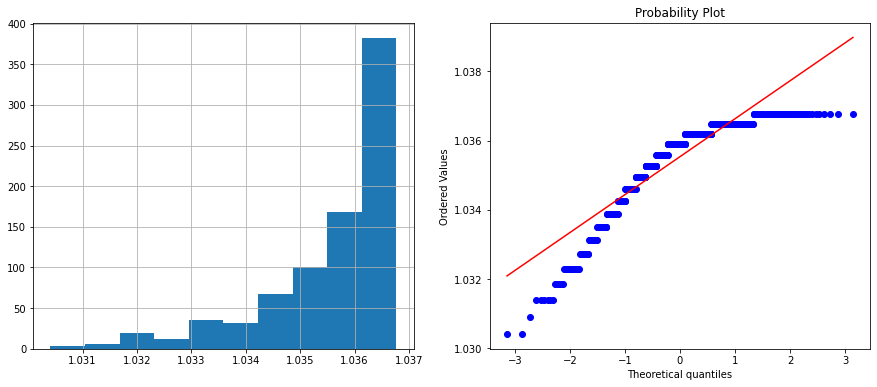

-1.486584052954531

In [52]:
df['NormStan']= (df['Standardized Score']+1)**(1/100)
diagnostic_plots(df,'NormStan')
df['NormStan'].skew()

Optimal lambda:  6.005567353109777


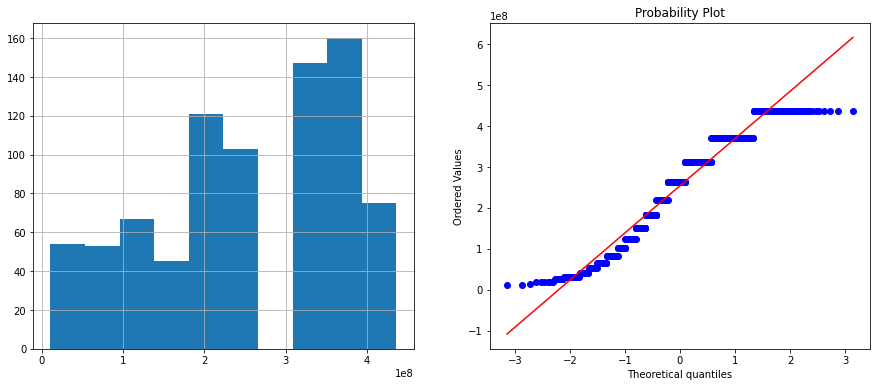

-0.2928473356864345

In [53]:
df['Fare_boxcox'], param = stats.boxcox(df['Standardized Score']+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Fare_boxcox')
df['Fare_boxcox'].skew()

In [54]:
#After trying out several types of transoformation, BoxCox transformation is able to efficinectly bring skewness to -0.3

In [55]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,...,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score,NormStan,Fare_boxcox
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,...,No,No,Yes,Yes,No,Yes,No,35.0,1.036485,3.697647e+08
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,...,No,No,Yes,Yes,Yes,No,No,34.0,1.036193,3.122127e+08
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,...,No,No,Yes,Yes,No,Yes,Yes,34.0,1.036193,3.122127e+08
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,...,No,Yes,Yes,Yes,No,Yes,Yes,35.0,1.036485,3.697647e+08
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,...,No,Yes,No,Yes,No,Yes,Yes,35.0,1.036485,3.697647e+08


In [56]:
df['Standardized Score'], param = stats.boxcox(df['Standardized Score']+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Standardized Score')
df['Standardized Score'].skew()

Optimal lambda:  6.005567353109777


-0.2928473356864345

In [57]:
df.drop(['NormStan','Fare_boxcox'], axis = 1, inplace = True)
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,3.697647e+08
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,3.122127e+08
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,3.122127e+08
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,3.697647e+08
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,3.697647e+08


In [58]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [59]:
categorical_features.remove('Accepted')

In [60]:
categorical_features

['College',
 'EA/RA',
 'Rank',
 'SAT II',
 'AP',
 'IB',
 'Gender',
 'Ethnicity',
 'Residency Status',
 'Legacy',
 'First-Gen',
 'Financial Aid',
 'Student Gov',
 'Leadership',
 'Sports',
 'Volunteer',
 'Performing Arts']

In [61]:
df

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,3.697647e+08
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,3.122127e+08
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,3.122127e+08
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,3.697647e+08
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,3.697647e+08
5,No,Ross School of Business,Early Action / EA,Other,0,1-3,1,Female,South Asian,Out-of-State,No,Yes,No,Yes,Yes,Yes,Yes,Yes,3.122127e+08
6,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,No,No,No,Yes,Yes,3.122127e+08
7,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,5,Female,South Asian,In-State,No,No,No,No,Yes,No,Yes,Yes,3.122127e+08
8,Yes,College of Engineering (CoE),Regular Decision / RD,Top 2%,2 and above,10 and above,0,Male,East Asian,Out-of-State,No,Yes,Yes,No,Yes,Yes,Yes,Yes,4.359002e+08
9,No,"College of Literature, Science, and the Arts (...",Regular Decision / RD,Top 50%,0,4-6,0,Female,East Asian,Out-of-State,No,No,No,No,Yes,No,Yes,No,2.623287e+08


<AxesSubplot:xlabel='Accepted', ylabel='count'>

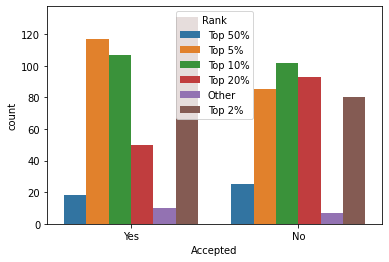

In [62]:
sns.countplot(x = 'Accepted', hue = 'Rank', data = df)

In [63]:
(df['Gender'] == 'Other').sum()/825*100

0.7272727272727273

Handling Rare Categorical Features

In [64]:
categorical_features

['College',
 'EA/RA',
 'Rank',
 'SAT II',
 'AP',
 'IB',
 'Gender',
 'Ethnicity',
 'Residency Status',
 'Legacy',
 'First-Gen',
 'Financial Aid',
 'Student Gov',
 'Leadership',
 'Sports',
 'Volunteer',
 'Performing Arts']

In [65]:
for feature in categorical_features:
    temp = df.groupby(feature)['Accepted'].count()/len(df)
    temp_df = temp[temp > 0.01].index
    df[feature] = np.where(df[feature].isin(temp_df), df[feature], 'Rare_Var')

In [66]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,3.697647e+08
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,3.122127e+08
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,3.122127e+08
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,3.697647e+08
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,3.697647e+08


In [67]:
df['Ethnicity'].unique()

array(['South Asian', 'East Asian', 'Caucasian',
       'Latino/Hispanic or Spanish Origin', 'Mixed', 'Middle Eastern',
       'African', 'Rare_Var'], dtype=object)

In [68]:
df.groupby('Ethnicity')['Accepted'].count()

Ethnicity
African                               19
Caucasian                            371
East Asian                           163
Latino/Hispanic or Spanish Origin     38
Middle Eastern                        16
Mixed                                 35
Rare_Var                               7
South Asian                          176
Name: Accepted, dtype: int64

In [69]:
df

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,3.697647e+08
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,3.122127e+08
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,3.122127e+08
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,3.697647e+08
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,3.697647e+08
5,No,Ross School of Business,Early Action / EA,Other,0,1-3,1,Female,South Asian,Out-of-State,No,Yes,No,Yes,Yes,Yes,Yes,Yes,3.122127e+08
6,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,No,No,No,Yes,Yes,3.122127e+08
7,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,5,Female,South Asian,In-State,No,No,No,No,Yes,No,Yes,Yes,3.122127e+08
8,Yes,College of Engineering (CoE),Regular Decision / RD,Top 2%,2 and above,10 and above,0,Male,East Asian,Out-of-State,No,Yes,Yes,No,Yes,Yes,Yes,Yes,4.359002e+08
9,No,"College of Literature, Science, and the Arts (...",Regular Decision / RD,Top 50%,0,4-6,0,Female,East Asian,Out-of-State,No,No,No,No,Yes,No,Yes,No,2.623287e+08


In [70]:
## Feature Scaling

In [71]:
categorical_features

['College',
 'EA/RA',
 'Rank',
 'SAT II',
 'AP',
 'IB',
 'Gender',
 'Ethnicity',
 'Residency Status',
 'Legacy',
 'First-Gen',
 'Financial Aid',
 'Student Gov',
 'Leadership',
 'Sports',
 'Volunteer',
 'Performing Arts']

In [72]:
for feature in categorical_features:
    print(feature)
    df[feature] = pd.factorize(df[feature])[0]

College
EA/RA
Rank
SAT II
AP
IB
Gender
Ethnicity
Residency Status
Legacy
First-Gen
Financial Aid
Student Gov
Leadership
Sports
Volunteer
Performing Arts


In [73]:
df['SAT II'].value_counts()

2    374
0    310
1    141
Name: SAT II, dtype: int64

In [74]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.697647e+08
1,Yes,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,3.122127e+08
2,Yes,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,3.122127e+08
3,Yes,0,0,3,0,2,0,1,0,1,0,0,1,0,0,0,0,1,3.697647e+08
4,Yes,1,0,2,1,2,0,0,0,1,0,0,1,1,0,0,0,1,3.697647e+08


In [75]:
feature_scale=[feature for feature in df.columns if feature not in ['Accepted']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [76]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.697647e+08
1,Yes,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,3.122127e+08
2,Yes,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,3.122127e+08
3,Yes,0,0,3,0,2,0,1,0,1,0,0,1,0,0,0,0,1,3.697647e+08
4,Yes,1,0,2,1,2,0,0,0,1,0,0,1,1,0,0,0,1,3.697647e+08


In [77]:
df = pd.concat([df[['Accepted']].reset_index(drop=True), pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [78]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.844411
1,Yes,0.000000,0.0,0.2,0.5,0.25,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.709015
2,Yes,0.000000,0.0,0.4,0.0,0.00,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.709015
3,Yes,0.000000,0.0,0.6,0.0,0.50,0.0,0.5,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.844411
4,Yes,0.333333,0.0,0.4,0.5,0.50,0.0,0.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.844411


In [79]:
df['Standardized Score'].skew()

-0.29284733568643545

Randomize Data


In [80]:
df['Accepted'].unique()

array(['Yes', 'No'], dtype=object)

In [81]:
df['Accepted']

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
5       No
6      Yes
7      Yes
8      Yes
9       No
10     Yes
11     Yes
12      No
13     Yes
14      No
15     Yes
16      No
17      No
18      No
19      No
20      No
21      No
22      No
23     Yes
24     Yes
25     Yes
26      No
27     Yes
28     Yes
29      No
      ... 
795     No
796     No
797     No
798    Yes
799    Yes
800     No
801     No
802     No
803     No
804     No
805     No
806     No
807    Yes
808     No
809     No
810     No
811    Yes
812    Yes
813    Yes
814     No
815    Yes
816     No
817     No
818     No
819     No
820    Yes
821     No
822     No
823     No
824    Yes
Name: Accepted, Length: 825, dtype: object

In [82]:
#df['Accepted'] = pd.get_dummies(df['Accepted'],drop_first = True).head()

In [83]:
df

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.844411
1,Yes,0.000000,0.0,0.2,0.5,0.25,0.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.709015
2,Yes,0.000000,0.0,0.4,0.0,0.00,0.0,0.5,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.709015
3,Yes,0.000000,0.0,0.6,0.0,0.50,0.0,0.5,0.000000,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.844411
4,Yes,0.333333,0.0,0.4,0.5,0.50,0.0,0.0,0.000000,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.844411
5,No,0.666667,0.0,0.8,1.0,0.00,0.2,0.5,0.000000,0.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.709015
6,Yes,0.333333,0.0,0.4,0.0,0.00,0.0,0.5,0.000000,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.709015
7,Yes,0.000000,0.0,0.2,0.5,0.25,0.4,0.5,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.709015
8,Yes,0.000000,1.0,1.0,0.0,0.50,0.0,0.0,0.142857,0.5,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.000000
9,No,0.333333,1.0,0.0,1.0,0.75,0.0,0.5,0.142857,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.591658


In [84]:
df['Accepted'].unique()

array(['Yes', 'No'], dtype=object)

In [85]:
df = df.sample(frac=1).reset_index(drop=True)

In [86]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,0.666667,0.0,0.4,1.0,0.00,0.0,0.5,0.285714,0.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.591658
1,No,0.333333,0.0,0.6,1.0,0.00,0.0,0.5,0.285714,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.166815
2,Yes,0.333333,1.0,0.4,1.0,0.00,0.0,0.5,0.142857,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.709015
3,No,0.333333,1.0,0.2,1.0,0.25,0.2,0.5,0.285714,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.033519
4,No,0.666667,0.0,0.4,1.0,0.00,0.0,0.5,0.285714,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.265541


In [87]:
df['Accepted'].value_counts()

Yes    433
No     392
Name: Accepted, dtype: int64

Convert Accepted into numerical column

In [88]:
df['Accepted'] = df.Accepted.map({'Yes':1, 'No':0})

In [89]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,1,0.666667,0.0,0.4,1.0,0.00,0.0,0.5,0.285714,0.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.591658
1,0,0.333333,0.0,0.6,1.0,0.00,0.0,0.5,0.285714,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.166815
2,1,0.333333,1.0,0.4,1.0,0.00,0.0,0.5,0.142857,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.709015
3,0,0.333333,1.0,0.2,1.0,0.25,0.2,0.5,0.285714,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.033519
4,0,0.666667,0.0,0.4,1.0,0.00,0.0,0.5,0.285714,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.265541


In [90]:
df.Accepted.value_counts()

1    433
0    392
Name: Accepted, dtype: int64

In [91]:
df.skew()

Accepted             -0.099698
College               0.826103
EA/RA                 0.797223
Rank                  0.326150
SAT II               -0.153540
AP                    0.187969
IB                    3.377161
Gender               -0.507069
Ethnicity             1.234751
Residency Status     -0.164412
Legacy                1.947397
First-Gen             2.145841
Financial Aid        -0.148555
Student Gov          -0.903079
Leadership            1.173724
Sports               -0.546254
Volunteer             1.367186
Performing Arts       0.075342
Standardized Score   -0.292847
dtype: float64

Feature Selection

In [92]:
#from sklearn.linear_model import Lasso
#from sklearn.feature_selection import SelectFromModel

#pd.pandas.set_option('display.max_columns', None)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'Accepted'), df['Accepted'], test_size=0.3, random_state = 9)

In [95]:
y_train.sum()

295

In [96]:
y_test.sum()

138

In [97]:
#feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
#feature_sel_model.fit(X_train, y_train)

In [98]:
#feature_sel_model.get_support()

In [99]:
#selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
#print('total features: {}'.format((X_train.shape[1])))
#print('selected features: {}'.format(len(selected_feat)))


In [100]:
#selected_feat

In [101]:
#X_train = X_train[selected_feat]
#X_test = X_test[selected_feat]

In [102]:
#X_train.head()

Building Model

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
logmodel = LogisticRegression()

In [114]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [116]:
type(X_train)


pandas.core.frame.DataFrame

In [106]:
predictions = logmodel.predict(X_test)

In [117]:
predictions


array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0])

In [107]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       110
           1       0.69      0.67      0.68       138

    accuracy                           0.65       248
   macro avg       0.65      0.65      0.65       248
weighted avg       0.65      0.65      0.65       248



In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
confusion_matrix(y_test, predictions)

array([[69, 41],
       [46, 92]])

In [111]:
import pickle
pickle.dump(logmodel, open('model.pkl', 'wb'))

In [112]:
X_test.head()

,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
211,0.333333,0.0,0.4,1.0,0.50,0.0,0.0,0.142857,0.5,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.709015
408,0.000000,0.0,0.2,1.0,0.25,0.0,0.0,0.285714,0.5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.591658
700,0.333333,0.0,0.2,1.0,0.00,0.0,0.5,0.428571,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.050705
106,0.333333,0.0,0.2,1.0,1.00,0.0,0.0,0.285714,0.5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.709015
442,1.000000,0.0,0.4,0.5,0.00,0.0,0.5,0.142857,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.265541


In [113]:
#input to give the model. 
'''

model = depickle()
model.predit(X_Test)

1) format for asking the form quetions. and what conversions to do
2) string , ill have to do cleaning of that data -> what conversions do. 
'''

'\n\nmodel = depickle()\nmodel.predit(X_Test)\n\n1) format for asking the form quetions. and what conversions to do\n2) string , ill have to do cleaning of that data -> what conversions do. \n'